In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [194]:
df = pd.read_csv("Resume_screen.csv")
print(df)

         Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]


In [195]:
counts= df['Category'].value_counts().reset_index()
Res= df['Resume'].value_counts()
print(counts)

                        index  Category
0              Java Developer        84
1                     Testing        70
2             DevOps Engineer        55
3            Python Developer        48
4               Web Designing        45
5                          HR        44
6                      Hadoop        42
7                  Blockchain        40
8               ETL Developer        40
9          Operations Manager        40
10               Data Science        40
11                      Sales        40
12        Mechanical Engineer        40
13                       Arts        36
14                   Database        33
15     Electrical Engineering        30
16         Health and fitness        30
17                        PMO        30
18           Business Analyst        28
19           DotNet Developer        28
20         Automation Testing        26
21  Network Security Engineer        25
22              SAP Developer        24
23             Civil Engineer        24


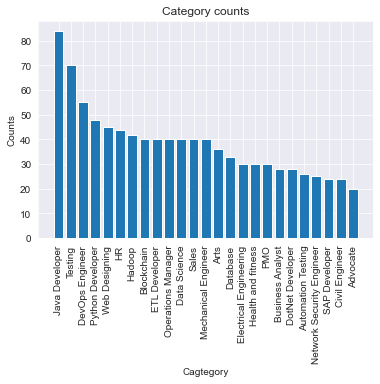

In [196]:
plt.bar(counts['index'],counts['Category'])
plt.xlabel('Cagtegory')
plt.ylabel('Counts')
plt.title('Category counts')
plt.xticks(rotation=90)
plt.show()

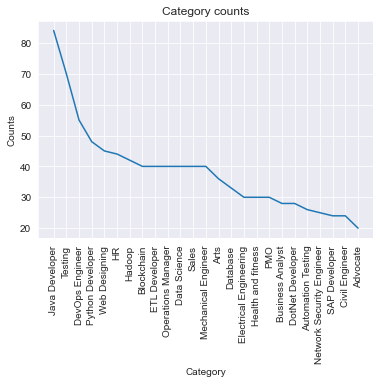

In [197]:
from matplotlib import pyplot as plt 
plt.plot(counts['index'],counts['Category'])
plt.xlabel('Category')
plt.ylabel('Counts')
plt.title('Category counts')
plt.xticks(rotation=90)
plt.show()

In [198]:
#Data Cleaning
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [199]:
df2=df.copy()

In [200]:
print(df2)

         Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]


In [201]:
category = df['Category'].value_counts()

In [202]:
df['cleaned'] = df['Resume'].apply(lambda x:cleanResume(x))
df.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [203]:
df.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [204]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shata\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


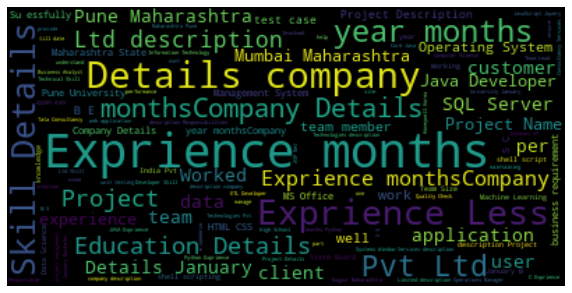

In [205]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [206]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [207]:
df.head()


,Category,Resume,cleaned
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [208]:
df.Category.value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: Category, dtype: int64

In [209]:
df2.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df['cleaned'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 7351)
(193, 7351)


In [219]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

nb = GaussianNB()
nb.fit(X_train_dense, y_train)
nb_pred = nb.predict(X_test_dense)

print('Accuracy of Naive Bayes Classifier on training set: {:.2f}'.format(nb.score(X_train_dense, y_train)))
print('Accuracy of Naive Bayes Classifier on test set:     {:.2f}'.format(nb.score(X_test_dense, y_test)))


Accuracy of Naive Bayes Classifier on training set: 1.00
Accuracy of Naive Bayes Classifier on test set:     1.00


In [216]:
from sklearn.naive_bayes import GaussianNB

# Define the Naive Bayes model
nb = GaussianNB()

# Train the model on the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
nb_pred = nb.predict(X_test)

# Print the accuracy score of the Naive Bayes model on both the training and test data
print('Accuracy of Naive Bayes Classifier on training set: {:.2f}'.format(nb.score(X_train, y_train)))
print('Accuracy of Naive Bayes Classifier on test set:     {:.2f}'.format(nb.score(X_test, y_test)))

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [221]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Model Training
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# create an SVM classifier with linear kernel
clf = svm.SVC(kernel='linear')

# train the classifier on the training set
clf.fit(X_train_dense, y_train)

# make predictions on the testing set
y_pred = clf.predict(X_test_dense)

# print the accuracy score
print("Accuracy:", clf.score(y_test, y_pred))

ValueError: Expected 2D array, got 1D array instead:
array=[10. 14.  0.  2. 18. 19. 15.  5. 18. 18. 12.  6. 15.  8.  3. 10. 16. 23.
  6. 15. 20. 19. 12. 21.  8.  6.  7.  7. 17. 12.  1. 21. 22.  5. 22. 17.
 10. 12. 15. 15. 22.  5.  1.  4. 23. 24.  8.  6. 15. 15. 11. 23. 19. 14.
  8. 16.  8. 23.  9.  4. 12. 15.  6. 15.  8.  3. 18. 24.  2. 10. 23.  2.
 22. 13.  0. 15. 19.  8. 13.  0. 20. 14.  1. 16. 21.  9. 23. 20. 23. 17.
 18. 24. 10. 13. 20.  1. 10.  8. 11.  7.  7. 14. 24. 22. 13. 15.  6.  9.
 14.  3.  4. 15. 20.  4. 11. 15. 16. 15.  0. 13. 15. 19.  6. 10. 20.  3.
 13. 12.  8. 11. 24. 16. 11.  6. 21. 18. 18. 14.  5.  7.  1.  5. 13. 15.
 12. 20. 23.  3. 20. 24. 18. 23. 12. 17. 15.  9.  1. 12. 16.  3. 20. 23.
  7. 20. 22. 16. 23. 24. 23. 17.  7. 23. 11.  1.  8. 13. 19. 23.  8. 10.
  4. 24.  3.  2.  3.  4.  9. 22. 24. 21.  2. 22. 16.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.